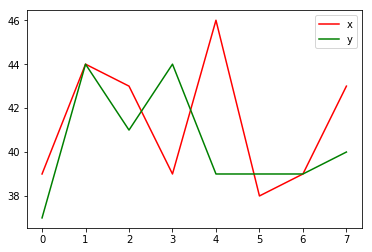

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

x = np.array([39, 44, 43, 39, 46, 38, 39, 43])
y = np.array([37, 44, 41, 44, 39, 39, 39, 40])

plt.plot(x,'r', label='x')
plt.plot(y, 'g', label='y')
plt.legend();

In [2]:
distances = np.zeros((len(y), len(x)))

for i in range(len(y)):
    for j in range(len(x)):
        distances[i,j] = abs(x[j]-y[i])  

print(distances)

[[2. 7. 6. 2. 9. 1. 2. 6.]
 [5. 0. 1. 5. 2. 6. 5. 1.]
 [2. 3. 2. 2. 5. 3. 2. 2.]
 [5. 0. 1. 5. 2. 6. 5. 1.]
 [0. 5. 4. 0. 7. 1. 0. 4.]
 [0. 5. 4. 0. 7. 1. 0. 4.]
 [0. 5. 4. 0. 7. 1. 0. 4.]
 [1. 4. 3. 1. 6. 2. 1. 3.]]


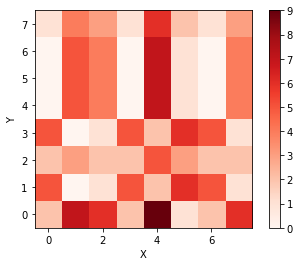

In [5]:
def distance_cost_plot(distances):
    im = plt.imshow(distances, interpolation='nearest', cmap='Reds') 
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.colorbar();

distance_cost_plot(distances)

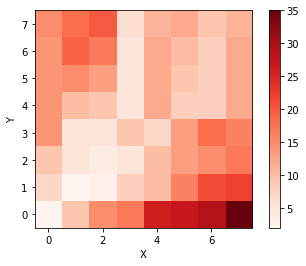

In [10]:
accumulated_cost = np.zeros((len(y), len(x)))

accumulated_cost[0,0] = distances[0,0]

for i in range(1, len(x)):
    accumulated_cost[0,i] = distances[0,i] + accumulated_cost[0, i-1]

for i in range(1, len(y)):
    accumulated_cost[i,0] = distances[i, 0] + accumulated_cost[i-1, 0]
    
for i in range(1, len(y)):
    for j in range(1, len(x)):
        accumulated_cost[i, j] = min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]) + distances[i, j]
        
distance_cost_plot(accumulated_cost)


In [11]:
path = [[len(x)-1, len(y)-1]]
i = len(y)-1
j = len(x)-1
while i>0 and j>0:
    if i==0:
        j = j - 1
    elif j==0:
        i = i - 1
    else:
        if accumulated_cost[i-1, j] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
            i = i - 1
        elif accumulated_cost[i, j-1] == min(accumulated_cost[i-1, j-1], accumulated_cost[i-1, j], accumulated_cost[i, j-1]):
            j = j-1
        else:
            i = i - 1
            j= j- 1
    path.append([j, i])
path.append([0,0])

print(path)

[[7, 7], [6, 6], [6, 5], [6, 4], [5, 4], [4, 3], [3, 2], [2, 1], [1, 1], [0, 0], [0, 0]]


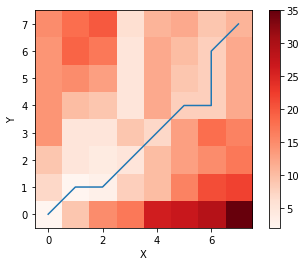

In [12]:
path_x = [point[0] for point in path]
path_y = [point[1] for point in path]

distance_cost_plot(accumulated_cost)
plt.plot(path_x, path_y);